In [9]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')
from ckine.model import nSpecies, getTotalActiveCytokine
from ckine.tensor_generation import ySolver

In [10]:
def input_IL2_15(final_conc, num):
    '''Function that creates the input for the solver. Takes in 1nM or 500nM for final_conc.'''
    Rexpr = np.array([3.8704, 0.734, 1.7147, 0.32010875, 0.0, 0.0, 0.0, 0.0]) #Il2ra, Il2rb, Il2rg, Il15ra, Il7r, Il9r, IL4Ra, IL21Ra in that order
    ligand_conc = np.zeros((num, 6)) # Cytokine stimulation concentrations in the following order: IL2, 15, 7, 9, 4, 21, and in nM.
    IL2 = np.linspace(final_conc, final_conc/num, num)
    IL15 = np.linspace(final_conc/num, final_conc, num)
    for ii in range(num):
        ligand_conc[ii, 0:2] = [IL2[ii], IL15[ii]]
    return ligand_conc, Rexpr, np.log(IL2/IL15)

def solve_IL2_IL15(final_conc, num, time, nSpecies):
    """Function to simulate model with IL2 and IL15 only at timepoint tps."""
    ligand_conc, Rexpr, xaxis = input_IL2_15(final_conc, num)
    tps = np.array([time])
    yOut = np.zeros((num, nSpecies()))
    active = np.zeros((num))
    for ii in range(num):
        yOut[ii] = ySolver(np.concatenate((ligand_conc[ii], Rexpr)), tps) 
        active[ii] = getTotalActiveCytokine(0, np.squeeze(yOut[ii])) + getTotalActiveCytokine(1, np.squeeze(yOut[ii]))
    return active, num, xaxis

Text(0.5, 1.0, 'Non-additive effects between IL2/15 in YT-1 cells (1nM)')

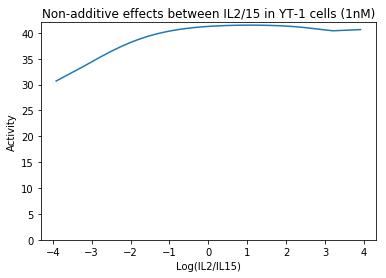

In [15]:
y,num, xaxis = solve_IL2_IL15(1.0, 50, 500.0, nSpecies)
f, ax = plt.subplots()
ax.plot(xaxis, y)
ax.set_xlabel('Log(IL2/IL15)')
ax.set_ylabel('Activity')
ax.set_ylim(bottom = 0)
ax.set_title('Non-additive effects between IL2/15 in YT-1 cells (1nM)')

Text(0.5, 1.0, 'Non-additive effects between IL2/15 in YT-1 cells (500nM)')

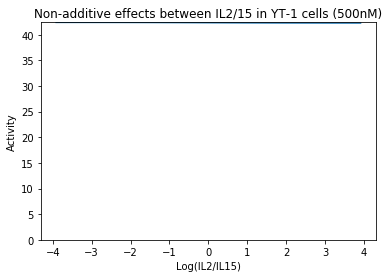

In [18]:
y,num, xaxis = solve_IL2_IL15(500.0, 50, 500.0, nSpecies)
f, ax = plt.subplots()
ax.plot(xaxis, y)
ax.set_xlabel('Log(IL2/IL15)')
ax.set_ylabel('Activity')
ax.set_ylim(bottom = 0)
ax.set_title('Non-additive effects between IL2/15 in YT-1 cells (500nM)')